Process image and select only lane from the image. 

Taken from udacity self-driving car nanodegree program: 
https://classroom.udacity.com/courses/ud013-preview/lessons/ca4dcf64-537a-49c7-9fbb-946c968174a9/concepts/b180303f-be20-4b38-a3d3-aa0ffe8d3ea0

image type: <class 'numpy.ndarray'>, shape: (540, 960, 3)


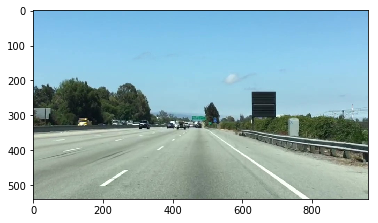

In [40]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

# Read in the image and print out some stats
im = mpimg.imread('images/road.jpg')
print('image type: {}, shape: {}'.format(type(im), im.shape))

# Grab the x and y size and make a copy of the image
ysize = im.shape[0]
xsize = im.shape[1]

# display the image
plt.imshow(im)
plt.show()


original image:


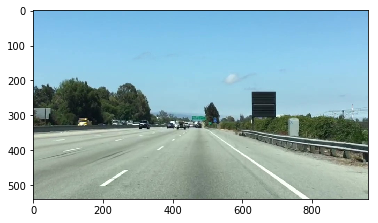

red channel:


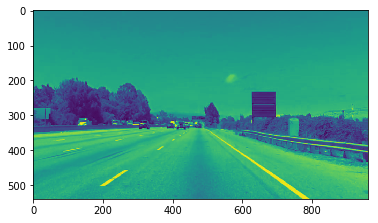

green channel:


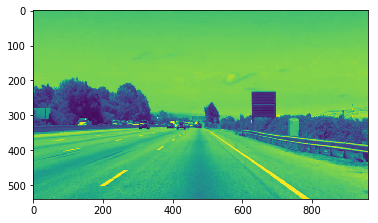

blue channel:


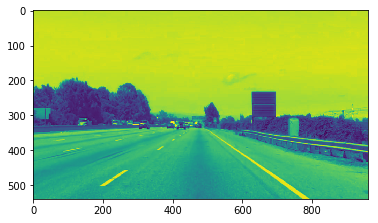

below threshold:
 [[ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]]

color-selected image:


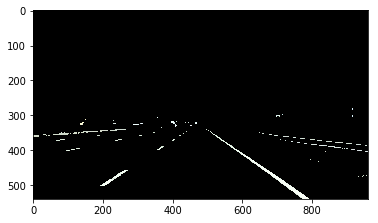

In [41]:
# Identify pixels below the threshold

# create copy of original image (don't simpy use "=" because the image is mutable)
color_select = np.copy(im)

print()

print("original image:")
plt.imshow(color_select)
plt.show()

print("red channel:")
plt.imshow(color_select[:,:,0])
plt.show()

print("green channel:")
plt.imshow(color_select[:,:,1])
plt.show()

print("blue channel:")
plt.imshow(color_select[:,:,2])
plt.show()

# define rgb thresholds to focus on lane color (white)
rgb_threshold = [200, 200, 200]

# select any pixels below the threshold and set them to zero.
thresholds = (im[:,:,0] < rgb_threshold[0]) | (im[:,:,1] < rgb_threshold[1]) | (im[:,:,2] < rgb_threshold[2])
print('below threshold:\n', thresholds)

# black out all pixels at `thresholds`
color_select[thresholds] = [0,0,0]

print()

# Display the image
print('color-selected image:')
plt.imshow(color_select)
plt.show()

original image:


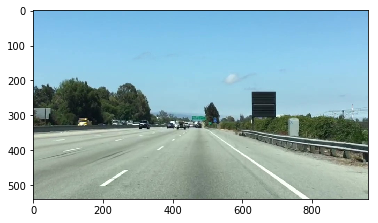

only lane:


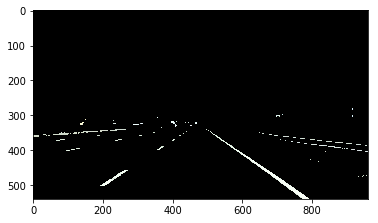

original image:


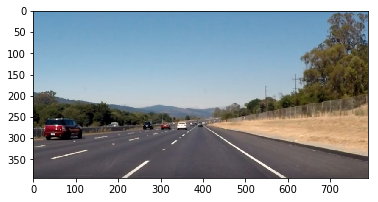

only lane:


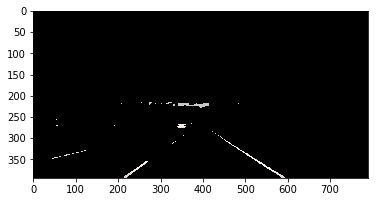

In [47]:
# putting it into function
def select_lane(im_original: np.ndarray, rgb_threshold = None) -> np.ndarray:
    if rgb_threshold is None:
        rgb_threshold = [200, 200, 200]
    
    im = np.copy(im_original)
    thresholds = (im[:,:,0] < rgb_threshold[0]) | (im[:,:,1] < rgb_threshold[1]) | (im[:,:,2] < rgb_threshold[2])
    
    im[thresholds] = [0,0,0]
    return im


# select lane from image using funcion `select_lane`
im = mpimg.imread('images/road.jpg')
only_lane = select_lane(im)

print('original image:')
plt.imshow(im)
plt.show()

print('only lane:')
plt.imshow(only_lane)
plt.show()



# select lane from other image
im = mpimg.imread('images/road2.jpg')
only_lane = select_lane(im)

print('original image:')
plt.imshow(im)
plt.show()

print('only lane:')
plt.imshow(only_lane)
plt.show()

**Note:**
while the only-lane image looks good, it's not practical yet since it still contain other pixels detected around the periphery. hence, we'll need to do more processing to settle it (beyond this notebook scope).